## 영상정보처리 13주차 과제 템플리트
- 마감: 12월 6일 11시 59분 PM
- 점수: 10점 만점
    
이름: 이상민       
학번: 32153180

입력 이미지: 자유 또는 도형이 필요한 경우 직접 코드 상에서 작성해서 사용해도 무방



# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%cd /gdrive/MyDrive/ImageProcClass/Week14
%ls

/gdrive/MyDrive/ImageProcClass/Week14
2020-2-ImgProc-HW14-이상민-32153180.ipynb


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

def show_with_matplotlib(img, title):
  img_RGB = img[:, :, ::-1]
  plt.imshow(img_RGB)
  plt.title(title)
  plt.axis('off')

def show_with_matplotlib_gray(img, title):
  plt.imshow(img, cmap="gray")
  plt.title(title)
  plt.axis('off')

##문제 1
이번 학기 배운 토픽 중에서 본인이 흥미 있다고 생각하는 프로세싱 또는 함수들을 응용하여, 목표를 제시하고 코드와 결과를 제시하시오. 




  









---

### Introduction
9주차 과제로 메시의 셔츠를 검출했던 histogram projection 과정이 가장 기억에 남았습니다.  
과제에서는 검출하고자 하는 ROI 이미지를 가져와서 사용하지만 이를 조금 더 응용해보고 싶었습니다.  
인터넷에 돌아다니는 이미지 중 원하는 색생만 추출해보면 어떨까라는 생각과 함께 본 과제를 진행했습니다.

### Function
- convert_url_to_image
  - urllib.request 라이브러리 이용
  - url 이미지를 cv2에서 사용할 수 있도록 변형

- hex_to_RGB
  - 16진수 색상 코드 입력
  - 입력된 코드 RGB 값으로 변환

- backprojection

In [4]:
# function for get url image
def convert_url_to_image():
  url = urllib.request.urlopen(input('URL 입력 : '))
  image = np.asarray(bytearray(url.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  
  return image

# function for convert hex to RGB color code
def hex_to_RGB():
  color = input('색상 코드 입력 (ex. #ffffff) : ')
  color = color[1:]
  r, g, b = tuple(int(color[i:i+2], 16) for i in (0, 2, 4))
  
  base = np.zeros((20, 20, 3), dtype="uint8")
  base[:] = (b, g, r)
  print('(R, G, B) = ({}, {}, {})'.format(r, g, b))

  return base

# function for backprojection
def backprojection(target, base):
  base_hsv = cv2.cvtColor(base, cv2.COLOR_BGR2HSV)
  target_hsv = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)
  
  base_hist = cv2.calcHist([base_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
  cv2.normalize(base_hist, base_hist, 0, 255, cv2.NORM_MINMAX)
  
  dst = cv2.calcBackProject([target_hsv], [0, 1], base_hist, [0, 180, 0, 256], 1)
  disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

  cv2.filter2D(dst, -1, disc, dst)
  ret, thresh = cv2.threshold(dst, 100, 255, 0)

  thresh = cv2.merge((thresh, thresh, thresh))
  res = cv2.bitwise_and(target, thresh)
  
  return res

URL 입력 : https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Synthese%2B.svg/330px-Synthese%2B.svg.png
색상 코드 입력 (ex. #ffffff) : #00ffff
(R, G, B) = (0, 255, 255)


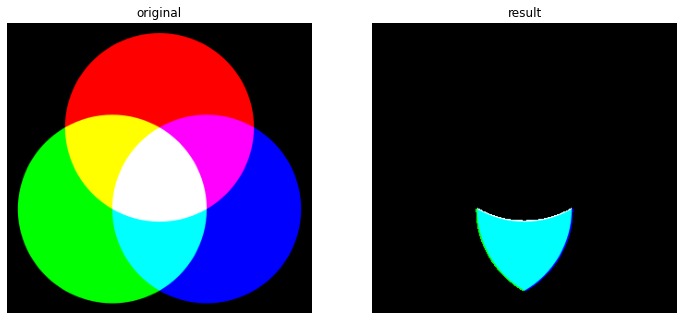

In [5]:
image = convert_url_to_image()
base = hex_to_RGB()

result = backprojection(image, base)

plt.figure(figsize=(12, 6))
plt.subplot(121)
show_with_matplotlib(image, 'original')
plt.subplot(122)
show_with_matplotlib(result, 'result')
plt.show()

URL 입력 : http://sampartners1.cafe24.com/wp/wp-content/uploads/2019/02/mickey_24.png
색상 코드 입력 (ex. #ffffff) : #ffd200
(R, G, B) = (255, 210, 0)


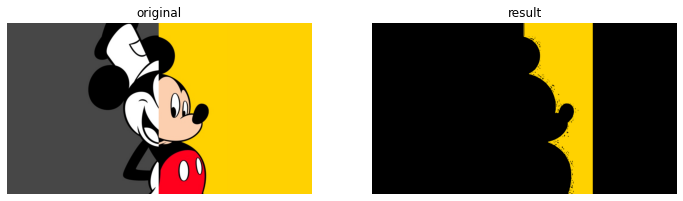

In [6]:
image = convert_url_to_image()
base = hex_to_RGB()

result = backprojection(image, base)

plt.figure(figsize=(12, 6))
plt.subplot(121)
show_with_matplotlib(image, 'original')
plt.subplot(122)
show_with_matplotlib(result, 'result')
plt.show()

URL 입력 : http://postfiles14.naver.net/20151005_285/samadare_1444056422418I4ouh_PNG/52ea27cbe828057b356fc919988cae67.png?type=w2
색상 코드 입력 (ex. #ffffff) : #0098e3
(R, G, B) = (0, 152, 227)


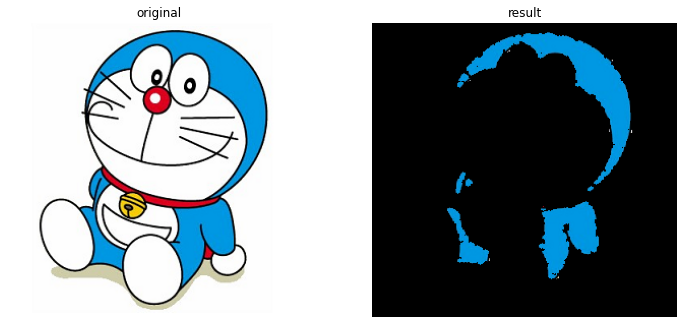

In [7]:
image = convert_url_to_image()
base = hex_to_RGB()

result = backprojection(image, base)

plt.figure(figsize=(12, 6))
plt.subplot(121)
show_with_matplotlib(image, 'original')
plt.subplot(122)
show_with_matplotlib(result, 'result')
plt.show()

### Conclusion
실제 사진으로도 테스트 해봤는데 검출하고자 하는 부분을 이미지가 아닌 단순한 색 영역을 이용하기 때문에 제대로 검출해내지 못했습니다.  
그래서 보다 뚜렷한 색상을 지닌 캐릭터 이미지에서 더 좋은 결과를 보였습니다.  
하지만 두 번째로 테스트한 미키마우스 이미지에서는 색을 전부 검출해내지 못했습니다. 확실히 육안으로 보는 것과 컴퓨터가 내부에서 처리하는 것과는 큰 차이가 있음을 느꼈습니다.